# TP 5 Espaces de couleurs et segmantation

Dans ce TP, nous aimerions implémenter les changements d'espace de couleurs: niveaux de gris, RVB, TSV, XYZ. Nous aimerions ensuite appliquer une segmentation de l'image à travers des seuillages.

In [72]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

True

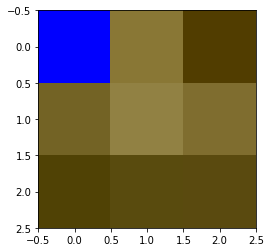

In [73]:
# creer l'image
# dans cette première image, nous changeons le pixel 0
# Nous voulons en fait, voir la difference en plt et cv2
height=3
width=3
I = np.zeros((height,width,3), np.uint8)

# Remplir l'image
# notons que :
# pour opencv, les canaux sont: BVR
# pour metplot, les canaux sont: RVB
# cannal B
I[0,0,0]=0 ; I[0,1,0]=137 ; I[0,2,0]=81 
I[1,0,0]=115 ; I[1,1,0]=145 ; I[1,2,0]=127
I[2,0,0]=80 ; I[2,1,0]=89 ; I[2,2,0]=90

# cannal V
I[0,0,1]=0 ; I[0,1,1]=119 ; I[0,2,1]=61  
I[1,0,1]=99; I[1,1,1]=129; I[1,2,1]=109
I[2,0,1]=66 ; I[2,1,1]=75 ; I[2,2,1]=74

# Cannal R
I[0,0,2]=255; I[0,1,2]=53; I[0,2,2]=0
I[1,0,2]=37 ; I[1,1,2]=67; I[1,2,2]=47
I[2,0,2]=5; I[2,1,2]=14 ; I[2,2,2]=15

plt.imshow(I)
# sauvegarder en opencv pour voir la difference avec plt
Icv=np.uint8(I)
cv2.imwrite("i.png",Icv)
# remarquer l'image résultant de la sauvegarde

image sauvegardé avec opencv, remarquer la perte d'informaiton dûe à la compression ainsi que le premier pixel bleu en plt, rouge en opencv
<img src="i.png" alt="drawing" width="100"/>

In [74]:
# changer la valeur du premier pixel
# dans ce TP nous utilisons la representation de opencv 
# ceci car nous voulons comparer avec les changement de caneaux d'opencv
I[0,0,0:]=[124,106,40]
I

array([[[124, 106,  40],
        [137, 119,  53],
        [ 81,  61,   0]],

       [[115,  99,  37],
        [145, 129,  67],
        [127, 109,  47]],

       [[ 80,  66,   5],
        [ 89,  75,  14],
        [ 90,  74,  15]]], dtype=uint8)

# Convertir en niveaux de gris

array([[ 90.  , 103.  ,  47.33],
       [ 83.67, 113.67,  94.33],
       [ 50.33,  59.33,  59.67]])

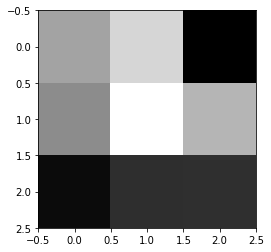

In [75]:
# convert I from RGB to gray with alpha=1/3 beta =1/3 and gamma =1/3
alpha=1/3
beta=1/3
gamma=1/3
Ig=(alpha*I[:,:,0]+beta*I[:,:,1]+gamma*I[:,:,2])
plt.imshow(Ig,cmap='gray')
np.round(Ig,2)

array([[ 88.32, 101.32,  45.04],
       [ 82.29, 112.29,  92.51],
       [ 49.36,  58.36,  58.18]])

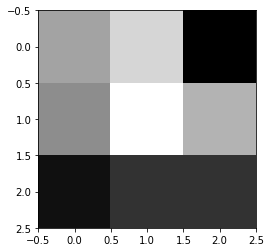

In [76]:
# convertir I de RVB à niveau de gris avec :
alpha=0.299 
beta =0.587 
gamma =0.114
Ig=(alpha*I[:,:,2]+beta*I[:,:,1]+gamma*I[:,:,0])
plt.imshow(Ig,cmap='gray')
np.round(Ig,2)

array([[ 88, 101,  45],
       [ 82, 112,  93],
       [ 49,  58,  58]], dtype=uint8)

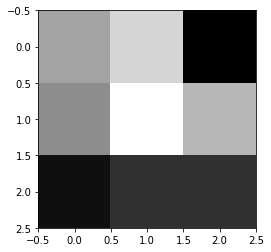

In [77]:
# convertir en utilisant opencv
Igcv = cv2.cvtColor(Icv, cv2.COLOR_BGR2GRAY)
plt.imshow(Igcv, cmap='gray')
np.round(Igcv,2)

In [78]:
# afficher en utilisant opencv
cv2.imshow('',Igcv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert to HSV space

In [79]:
# Nous utiliserons la fonction min pour convertir les cannaux
I.min(0)
# cela donne le min tel que:
# la première valeur (line 0 colone 0 du resultat)
# = min de toutes les lignes de la colone 0 canal 0
# la deuxieme valeur (line 0 colone 1 du resultat)
# = min de toutes les lignes de la colone 1 canal 0

# vous pouvez également vérifier ce que signifie I.min(1) et I.min(2) 

array([[80, 66,  5],
       [89, 75, 14],
       [81, 61,  0]], dtype=uint8)

In [80]:
# convertir I de RVB to TSV 
I=np.double(I)

Ihsv = np.zeros((height,width,3), np.double)
alpha=1/3
beta=1/3
gamma=1/3

v=(alpha*I[:,:,0]+beta*I[:,:,1]+gamma*I[:,:,2])
np.round(v,2)

array([[ 90.  , 103.  ,  47.33],
       [ 83.67, 113.67,  94.33],
       [ 50.33,  59.33,  59.67]])

In [81]:
s=1-(3*I.min(2)/(I[:,:,0]+I[:,:,1]+I[:,:,2]))
np.round(s,2)

array([[0.56, 0.49, 1.  ],
       [0.56, 0.41, 0.5 ],
       [0.9 , 0.76, 0.75]])

In [82]:
#theta
nom=(I[:,:,2]-I[:,:,0]+I[:,:,2]-I[:,:,1])
denom=(2*np.sqrt(np.power(I[:,:,2]-I[:,:,1], 2*np.ones((height,width)))+(I[:,:,2]-I[:,:,0])*(I[:,:,1]-I[:,:,0])))
theta=np.arccos(nom/denom)
stemp=theta
np.round(stemp,2)

array([[2.94, 2.94, 2.9 ],
       [2.95, 2.95, 2.93],
       [2.97, 2.97, 2.94]])

In [83]:
for i in range(np.shape(I)[0]):
    for j in range(np.shape(I)[1]):
        if I[i,j,0]>I[i,j,1]:
            #stemp[i,j]=2*math.pi-theta[i,j]
            #stemp[i,j]
            a=2*math.pi-theta[i,j]
            stemp[i,j]=a
h=stemp
np.round(h,2)

array([[3.35, 3.35, 3.38],
       [3.34, 3.34, 3.36],
       [3.32, 3.32, 3.35]])

In [84]:
# final HSV
Ihsv[:,:,0]=h
Ihsv[:,:,1]=s
Ihsv[:,:,2]=v
np.round(Ihsv,2)

array([[[  3.35,   0.56,  90.  ],
        [  3.35,   0.49, 103.  ],
        [  3.38,   1.  ,  47.33]],

       [[  3.34,   0.56,  83.67],
        [  3.34,   0.41, 113.67],
        [  3.36,   0.5 ,  94.33]],

       [[  3.32,   0.9 ,  50.33],
        [  3.32,   0.76,  59.33],
        [  3.35,   0.75,  59.67]]])

In [85]:
# convertir en utilisant opencv
# revenir vers uint8
cv2.cvtColor(Icv, cv2.COLOR_BGR2HSV)
# Le résultat sera different, voir :
#  https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor

array([[[ 96, 173, 124],
        [ 96, 156, 137],
        [ 97, 255,  81]],

       [[ 96, 173, 115],
        [ 96, 137, 145],
        [ 97, 161, 127]],

       [[ 96, 239,  80],
        [ 96, 215,  89],
        [ 96, 212,  90]]], dtype=uint8)

# RGB to XYZ

In [86]:
XYZ = np.zeros((np.shape(I)[0],np.shape(I)[1]), np.double)
Ixyz = np.zeros((np.shape(I)[0],np.shape(I)[1],3), np.double)

# you should always remember that cv had BGR representation instead of RGB
XYZ[0,0]=0.1805 
XYZ[0,1]=0.3576
XYZ[0,2]=0.4124
XYZ[1,0]=0.0722
XYZ[1,1]=0.7152
XYZ[1,2]= 0.2126
XYZ[2,0]= 0.9505
XYZ[2,1]=0.1192
XYZ[2,2]= 0.0193

for i in range(np.shape(I)[0]):
    for j in range(np.shape(I)[1]):        
        a=np.dot(XYZ,I[i,j,:])
        Ixyz[i,j,0]=a[0]
        Ixyz[i,j,1]=a[1]
        Ixyz[i,j,2]=a[2]

Ixyz

array([[[ 76.7836,  93.268 , 131.2692],
        [ 89.1401, 106.268 , 145.4262],
        [ 36.4341,  49.4754,  84.2617]],

       [[ 71.4187,  86.974 , 121.8224],
        [ 99.9337, 116.974 , 154.4924],
        [ 81.2847,  97.1184, 134.6134]],

       [[ 40.1036,  54.0422,  84.0037],
        [ 48.6581,  63.0422,  93.8047],
        [ 48.8934,  62.6118,  94.6553]]])

In [87]:
 # convertir en utilisant opencv
Icv=np.uint8(I)
cv2.cvtColor(Icv, cv2.COLOR_BGR2XYZ)

array([[[ 77,  93, 131],
        [ 89, 106, 145],
        [ 36,  49,  84]],

       [[ 71,  87, 122],
        [100, 117, 154],
        [ 81,  97, 135]],

       [[ 40,  54,  84],
        [ 49,  63,  94],
        [ 49,  63,  95]]], dtype=uint8)

# Segmentation et seuillage

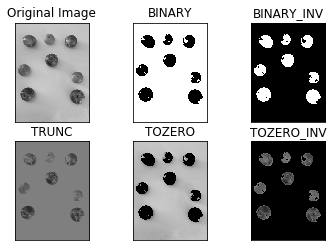

In [88]:
img = cv2.imread('appleorange.jpg',0)
plt.imshow(img)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

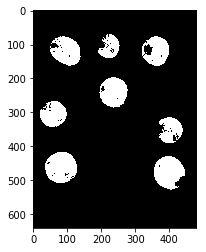

In [89]:
# inverser l'image 
imgINV= abs(thresh1 - 255)
plt.imshow(imgINV, cmap='gray')

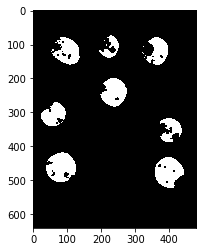

In [90]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(imgINV,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray')

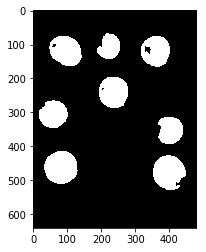

In [91]:
dilation = cv2.dilate(imgINV,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')

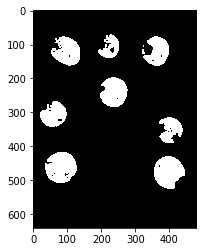

In [92]:
opening = cv2.morphologyEx(imgINV, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

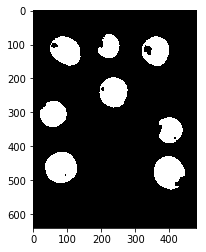

In [93]:
closing = cv2.morphologyEx(imgINV, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

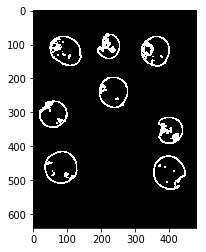

In [94]:
#difference entre dilation et erosin
gradient = cv2.morphologyEx(imgINV, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap='gray')